### - INTRODUCTION -

#### Why we chose this topic?
We are all curious about the origins of the universe. You don't need to have a background in astronomy to find stars fascinating!

Previously, you _may_ have needed a background in astronomy/physics to make sense of star data. But with the tools available to us in the age of AI and machine learning, insights about stars and the universe have been made more accessible to the layperson.

#### The background for the topic
In this project we examine a NASA dataset available on Kaggle: https://www.kaggle.com/datasets/brsdincer/star-type-classification

The dataset is a catalogue of stars. The attributes recorded for each star include the star's temperature, luminosity, radius, brightness, color, spectral class, and type.

Some background on star types:
1. **Main Sequence**:the most common type of star (90% of all stars in the universe), range in size, color, luminosity, etc. and live for millions to billions of years.
2. **Red Giant**: created when a MS star that is LESS than 8x the sun's mass runs out of Hydrogen. Gravity causes the star to start to collapse, but this increases temperature and pressure inside the core so much that Helium starts to be converted to Carbon. The new hydrogen fusion causes outer layers to expand. Eventually, the red giant becomes unstable and begins pulsating from this tug of war between gravity and fusion.
3. **White Dwarf**: the dead core of a red giant that has shed all of its outer atmosphere. Since it produces no new heat of its own, it gradually cools over billions of years.
4. **Supergiant**: Created when a MS star that is between 8 - 20x the Sun’s mass runs out of hydrogen. Like red giants, it begins fusing helium into carbon. However, because of its higher mass, it continues fusion through heavier elements: carbon → neon, neon → oxygen, oxygen → silicon, and finally silicon → iron. Once iron forms, fusion can no longer produce energy to support the star against gravity, leading to core collapse and a supernova. The remains of the core may form a neutron star or a black hole depending on mass.
5. **Hypergiant**: even larger and more massive than supergiants, typically 30+ times the Sun’s mass. extremely bright but short-lived (a few million years), extremely rare
6. **Red Dwarf**: the smallest, coolest type of MS star. Have extremely long lifespans- possibly trillions of years.
7. **Brown Dwarf**: actually not technically a star. bigger than planets but never gain enough mass to do fusion on the scale of "real" stars

You can read more about stars here: https://science.nasa.gov/universe/stars/types/

#### The goal of this final project
The objective is to determine whether we can predict a star's type from some combination of the known attributes: temperature, luminosity, radius, brightness, color, and spectral type.

A star's type has to do with more than just these attributes- for instance mass and age are relevant.

The implication is that, if we can predict stellar type from a limited set of attributes and we can measure missing attributes for some stars of a known type, then in the future we may be able to infer those attributes for distant stars if we can determine their type.

### - DATA PREPROCESSING -

##### Requirements

In [7]:
# import packages
import pandas as pd
import numpy as np
import sklearn
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize


In [8]:
# Read the file
stars = pd.read_csv('Stars.csv')
stars.head(100)

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,Red,M,0
1,3042,0.000500,0.1542,16.60,Red,M,0
2,2600,0.000300,0.1020,18.70,Red,M,0
3,2800,0.000200,0.1600,16.65,Red,M,0
4,1939,0.000138,0.1030,20.06,Red,M,0
...,...,...,...,...,...,...,...
95,11250,672.000000,6.9800,-2.30,Blue-white,A,3
96,5112,0.630000,0.8760,4.68,Orange-Red,K,3
97,7720,7.920000,1.3400,2.44,yellow-white,F,3
98,12098,689.000000,7.0100,0.02,Blue-white,A,3


In [9]:
# check the shape of data
stars.shape
print('Dataframe stars has {0} rows and {1} columns.'.format(stars.shape[0], stars.shape[1]))

Dataframe stars has 240 rows and 7 columns.


####  Columns explanation
Temperature: Temperature(K) 

L: Relative Luminosity (L/Lo) 
- The energy of the star in comparison to the sun. It measures the total energy output per second (L) and divides it by the energy output of the sun (Lo) 
 
R: Relative Radius (R/Ro) 
- The radius of the star in comparison to the sun.  It measures the radius of the star (R) and divides by the radius of the 
sun (Ro) 

 

A_M: Absolute Magnitude (Mv) 
- the brightness of the star. Absolute magnitude calculates the brightness of stars as they would appear if it were 32.6 light-years, or 10 parsecs from Earth. .The absolute magnitude as the apparent magnitude the star would have if it were at a distance of 10 pc. Absolute magnitude in V is written MV .The bigger the number, the less luminous the star.  

Color: General Color of Spectrum

Spectral_Class: O,B,A,F,G,K,M 

Type: Red Dwarf, Brown Dwarf, White Dwarf, Main Sequence , Super Giants, Hyper Giants


In [11]:
stars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Temperature     240 non-null    int64  
 1   L               240 non-null    float64
 2   R               240 non-null    float64
 3   A_M             240 non-null    float64
 4   Color           240 non-null    object 
 5   Spectral_Class  240 non-null    object 
 6   Type            240 non-null    int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 13.3+ KB


In [12]:
# check the data if there are Nans 
stars.isnull().sum()

Temperature       0
L                 0
R                 0
A_M               0
Color             0
Spectral_Class    0
Type              0
dtype: int64

In [13]:
# check unique values to see if there are values we need to clean
stars['Temperature'].unique()

array([ 3068,  3042,  2600,  2800,  1939,  2840,  2637,  2650,  2700,
        3600,  3129,  3134,  3628,  3340,  2799,  3692,  3192,  3441,
       25000,  7740,  7220,  8500, 16500, 12990,  8570,  7700, 11790,
        7230, 39000, 30000, 15276,  9700,  5800,  8052,  6757,  6380,
        5936,  5587,  3826,  3365,  3270,  3200,  3008,  3575,  3574,
        3625, 33750,  3490,  3750,  3834,  3749,  3650,  3450,  3660,
        3752,  3535,  3341,  3432,  2983,  2835,  2935,  3295,  2945,
        2817,  2774,  2871,  3345,  3607,  3304,  3150,  3550,  3180,
        2890,  3342,  2621,  3158,  7100, 10574,  8930, 17200, 14100,
        9675, 12010, 10980, 13720, 19860,  5300,  4526,  4077,  4980,
        9030, 11250,  5112,  7720, 12098, 36108, 33300, 40000, 23000,
       17120, 11096, 14245, 24630, 12893, 24345, 33421,  3459,  3605,
        3615,  3399,  3610,  3553,  4015,  6850,  3780,  3323,  3531,
        3218,  3146,  3511,  3225,  2861,  2856,  2731,  3095,  3100,
        2989,  3542,

In [14]:
stars['L'].unique()

array([2.40000e-03, 5.00000e-04, 3.00000e-04, 2.00000e-04, 1.38000e-04,
       6.50000e-04, 7.30000e-04, 4.00000e-04, 6.90000e-04, 1.80000e-04,
       2.90000e-03, 1.22000e-02, 5.50000e-03, 6.00000e-04, 3.80000e-03,
       1.80000e-03, 3.67000e-03, 3.62000e-03, 3.90000e-02, 5.60000e-02,
       4.90000e-04, 1.70000e-04, 1.30000e-02, 8.50000e-05, 8.10000e-04,
       1.10000e-04, 1.50000e-04, 8.00000e-05, 2.04000e+05, 2.88400e+04,
       1.13600e+03, 7.40000e+01, 8.10000e-01, 8.70000e+00, 1.43000e+00,
       1.35000e+00, 1.35700e+00, 8.19000e-01, 2.00000e+05, 3.40000e+05,
       1.50000e+05, 1.95000e+05, 2.80000e+05, 3.20000e+05, 1.23000e+05,
       1.84000e+05, 2.20000e+05, 2.70000e+05, 2.83000e+05, 2.72000e+05,
       5.50000e+05, 3.10000e+05, 2.63000e+05, 3.63000e+05, 1.74000e+05,
       2.09000e+05, 5.60000e-03, 6.70000e-04, 2.40000e-04, 3.40000e-04,
       1.40000e-04, 9.80000e-04, 3.20000e-04, 3.60000e-04, 7.20000e-04,
       2.10000e-02, 2.20000e-02, 8.50000e-03, 8.80000e-03, 4.000

In [15]:
stars['R'].unique()

array([1.7000e-01, 1.5420e-01, 1.0200e-01, 1.6000e-01, 1.0300e-01,
       1.1000e-01, 1.2700e-01, 9.6000e-02, 1.3000e-01, 5.1000e-01,
       3.7610e-01, 1.9600e-01, 3.9300e-01, 1.4000e-01, 2.4000e-01,
       4.7000e-01, 1.9670e-01, 3.5100e-01, 8.4000e-03, 1.2340e-02,
       1.1000e-02, 1.0000e-02, 1.4000e-02, 9.8400e-03, 9.7000e-03,
       1.2800e-02, 1.3000e-02, 1.0600e+01, 6.3000e+00, 7.2000e+00,
       2.8900e+00, 9.0000e-01, 1.8000e+00, 1.1200e+00, 9.8000e-01,
       1.1060e+00, 9.9000e-01, 1.9000e+01, 2.3000e+01, 8.8000e+01,
       1.7000e+01, 2.5000e+01, 2.9000e+01, 4.5000e+01, 8.9000e+01,
       8.4000e+01, 2.6000e+01, 1.5200e+03, 1.2600e+03, 1.1830e+03,
       1.6480e+03, 1.3240e+03, 1.3490e+03, 1.6730e+03, 1.2840e+03,
       9.5500e+02, 1.5460e+03, 5.7000e-02, 1.9000e-01, 9.4000e-02,
       9.1800e-02, 1.1600e-01, 1.3200e-01, 9.3000e-02, 9.1100e-02,
       1.1800e-01, 1.2000e-01, 2.7300e-01, 3.8000e-01, 1.8000e-01,
       3.5000e-01, 2.9100e-01, 3.0700e-01, 9.8000e-02, 1.6100e

In [16]:
stars['A_M'].unique()

array([ 1.6120e+01,  1.6600e+01,  1.8700e+01,  1.6650e+01,  2.0060e+01,
        1.6980e+01,  1.7220e+01,  1.7400e+01,  1.7450e+01,  1.6050e+01,
        1.0690e+01,  1.1790e+01,  1.3210e+01,  1.0480e+01,  1.1782e+01,
        1.3070e+01,  1.4790e+01,  1.0800e+01,  1.3530e+01,  1.1180e+01,
        1.0580e+01,  1.4020e+01,  1.4230e+01,  1.4500e+01,  1.1890e+01,
        1.2230e+01,  1.4200e+01,  1.4470e+01,  1.2590e+01,  1.4080e+01,
       -4.7000e+00, -4.2000e+00, -1.9700e+00,  1.6000e-01,  5.0500e+00,
        2.4200e+00,  2.4100e+00,  2.9300e+00,  4.4600e+00,  5.0300e+00,
       -6.9300e+00, -6.2000e+00, -6.0200e+00, -7.2200e+00, -6.0000e+00,
       -6.6000e+00, -6.7800e+00, -5.2400e+00, -6.7400e+00, -6.1000e+00,
       -9.4000e+00, -7.6300e+00, -9.2000e+00, -8.0500e+00, -7.7900e+00,
       -1.1750e+01, -1.1920e+01, -1.1280e+01, -1.1240e+01, -1.1360e+01,
        1.6230e+01,  1.6940e+01,  1.6090e+01,  1.6960e+01,  1.8890e+01,
        1.7130e+01,  1.8340e+01,  1.6450e+01,  1.7390e+01,  1.94

In [17]:
stars['Color'].unique() 

array(['Red', 'Blue White', 'White', 'Yellowish White', 'Blue white',
       'Pale yellow orange', 'Blue', 'Blue-white', 'Whitish',
       'yellow-white', 'Orange', 'White-Yellow', 'white', 'yellowish',
       'Yellowish', 'Orange-Red', 'Blue-White'], dtype=object)

We noticed that there are several same colors in different form:
- 'Blue White', 'Blue white', 'Blue-white' and 'Blue-White'
- 'yellowish' and 'Yellowish'
- 'Yellowish White', 'yellow-white' and 'White-Yellow'
- 'White', 'white' and 'Whitish'

After cleaning, we'll have 9 colors (from red to blue):
'Red', 'Orange-Red', Orange', 'Pale yellow orange', 'Yellowish', 'Yellow-white', 'White', 'Blue-white', and 'Blue'.

In [19]:
stars['Color'].value_counts()

Color
Red                   112
Blue                   56
Blue-white             26
Blue White             10
yellow-white            8
White                   7
Blue white              4
white                   3
Yellowish White         3
yellowish               2
Whitish                 2
Orange                  2
White-Yellow            1
Pale yellow orange      1
Yellowish               1
Orange-Red              1
Blue-White              1
Name: count, dtype: int64

In [20]:
# clean the column Color
stars.loc[stars['Color'] == 'Blue White' , ['Color']] = 'Blue-white'
stars.loc[stars['Color'] =='Blue white', ['Color']] = 'Blue-white'
stars.loc[stars['Color'] =='Blue-White', ['Color']] ='Blue-white'

In [21]:
stars.loc[stars['Color'] == ('yellowish'), ['Color']] = 'Yellowish'

In [22]:
stars.loc[stars['Color'] == 'Yellowish White', ['Color']] = 'yellow-white'
stars.loc[stars['Color'] == 'White-Yellow', ['Color']] = 'yellow-white'

In [23]:
stars.loc[stars['Color'] == 'white', ['Color']] = 'White'
stars.loc[stars['Color'] == 'Whitish', ['Color']] = 'White'

In [24]:
# check
print((stars['Color'] == 'Blue White').sum())
print((stars['Color'] == 'Blue white').sum())
print((stars['Color'] == 'Blue-White').sum())
print((stars['Color'] == 'yellowish').sum())
print((stars['Color'] == 'Yellowish White').sum())
print((stars['Color'] == 'White-Yellow').sum())
print((stars['Color'] == 'white').sum())
print((stars['Color'] == 'Whitish').sum())

0
0
0
0
0
0
0
0


In [25]:
stars['Color'].value_counts() # Now we have 9 colors after cleaning column Color

Color
Red                   112
Blue                   56
Blue-white             41
White                  12
yellow-white           12
Yellowish               3
Orange                  2
Pale yellow orange      1
Orange-Red              1
Name: count, dtype: int64

In [26]:
stars.head(25)

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.17000,16.120,Red,M,0
1,3042,0.000500,0.15420,16.600,Red,M,0
2,2600,0.000300,0.10200,18.700,Red,M,0
3,2800,0.000200,0.16000,16.650,Red,M,0
4,1939,0.000138,0.10300,20.060,Red,M,0
5,2840,0.000650,0.11000,16.980,Red,M,0
6,2637,0.000730,0.12700,17.220,Red,M,0
7,2600,0.000400,0.09600,17.400,Red,M,0
8,2650,0.000690,0.11000,17.450,Red,M,0
9,2700,0.000180,0.13000,16.050,Red,M,0


In [27]:
len(stars['Color'].unique())

9

In [28]:
stars['Spectral_Class'].unique() # 7 spectral classes

array(['M', 'B', 'A', 'F', 'O', 'K', 'G'], dtype=object)

In [29]:
stars['Type'].unique()

array([0, 1, 2, 3, 4, 5])

#### There are 4 numerical features and 2 categorical features for input

In [31]:
# check normality
from scipy.stats import normaltest
stat, p = normaltest(stars['Temperature'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Temperature is Gaussian distribution(accept H0)')
else:
    print('Temperature is not Gaussian distribution (reject H0)')

Statistics=50.658, p=0.000
Temperature is not Gaussian distribution (reject H0)


In [32]:
stat, p = normaltest(stars['L'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('L is Gaussian distribution(accept H0)')
else:
    print('L is not Gaussian distribution (reject H0)')

Statistics=110.907, p=0.000
L is not Gaussian distribution (reject H0)


In [33]:
stat, p = normaltest(stars['R'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('R is Gaussian distribution(accept H0)')
else:
    print('R is not Gaussian distribution (reject H0)')

Statistics=89.496, p=0.000
R is not Gaussian distribution (reject H0)


In [34]:
stat, p = normaltest(stars['A_M'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('A_M is Gaussian distribution(accept H0)')
else:
    print('A_M is not Gaussian distribution (reject H0)')

Statistics=1878.973, p=0.000
A_M is not Gaussian distribution (reject H0)


#### Note: We manually scaled and encoded the features here for demonstration only. In the model building section, these steps will be performed within a pipeline.

In [36]:
# split categorical features and numerical feaure. 
from sklearn.compose import make_column_selector as col_selector

X = stars.copy().drop('Type', axis=1)
y = stars['Type']

# create an instance of make_col_selector for categorical data
categorical_cols_obj = col_selector(dtype_include=object)

# create a list of column names of catergorical data
categorical_features = categorical_cols_obj(X)
print("categorical_features:\n", categorical_features)

# create an instance of make_col_selector for numeric data
numerical_cols_obj = col_selector(dtype_include=np.number)
# create a list of column names of numeric data
numerical_features = numerical_cols_obj(X)
print("numerical_features:\n", numerical_features)

categorical_features:
 ['Color', 'Spectral_Class']
numerical_features:
 ['Temperature', 'L', 'R', 'A_M']


In [37]:
# handle categorical features with OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import make_pipeline

X_categorical = X[categorical_features] # dataframe of categorical features
X_numerical = X[numerical_features] # dataframe of numerical features

# We want to map Red to 0, Orange-Red to 1 ...  Blue to 8.
Color_categories = ['Red', 'Orange-Red', 'Orange', 'Pale yellow orange', 'Yellowish', 'yellow-white', 'White', 'Blue-white', 'Blue']                      

# We want to map M to 0, K to 1 ...  O to 6.
Spectral_categories = ['M', 'K', 'G', 'F', 'A', 'B', 'O']

# create an ordinalencoder object
oe = OrdinalEncoder(categories= [Color_categories, Spectral_categories])
encoded_X_categorical = oe.fit_transform(X_categorical)
print(encoded_X_categorical.shape)
encoded_X_categorical

(240, 2)


array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [7., 5.],
       [6., 4.],
       [6., 3.],
       [6., 4.],
       [7., 5.],
       [5., 3.],
       [7., 4.],
       [5., 3.],
       [5., 3.],
       [3., 3.],
       [8., 6.],
       [7., 5.],
       [7., 5.],
       [6., 5.],
       [5., 3.],
       [6., 4.],
       [5., 3.],
       [5., 3.],
       [5., 3.],
       [5., 3.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [8., 5.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [2., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.

In [38]:
X = pd.concat([X[numerical_features], pd.DataFrame(encoded_X_categorical, columns = categorical_features)], axis = 1)
X

,Temperature,L,R,A_M,Color,Spectral_Class
0,3068,0.002400,0.1700,16.12,0.0,0.0
1,3042,0.000500,0.1542,16.60,0.0,0.0
2,2600,0.000300,0.1020,18.70,0.0,0.0
3,2800,0.000200,0.1600,16.65,0.0,0.0
4,1939,0.000138,0.1030,20.06,0.0,0.0
...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,8.0,6.0
236,30839,834042.000000,1194.0000,-10.63,8.0,6.0
237,8829,537493.000000,1423.0000,-10.73,6.0,4.0
238,9235,404940.000000,1112.0000,-11.23,6.0,4.0


In [39]:
# do LabelEncoder on target feature'Type'
from sklearn.preprocessing import LabelEncoder
y = stars['Type']
le = LabelEncoder()
y = le.fit_transform(y)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5])

In [40]:
stars_data = pd.concat([X, pd.Series(y, name ='Type')], axis =1)
stars_data

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,0.0,0.0,0
1,3042,0.000500,0.1542,16.60,0.0,0.0,0
2,2600,0.000300,0.1020,18.70,0.0,0.0,0
3,2800,0.000200,0.1600,16.65,0.0,0.0,0
4,1939,0.000138,0.1030,20.06,0.0,0.0,0
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,8.0,6.0,5
236,30839,834042.000000,1194.0000,-10.63,8.0,6.0,5
237,8829,537493.000000,1423.0000,-10.73,6.0,4.0,5
238,9235,404940.000000,1112.0000,-11.23,6.0,4.0,5


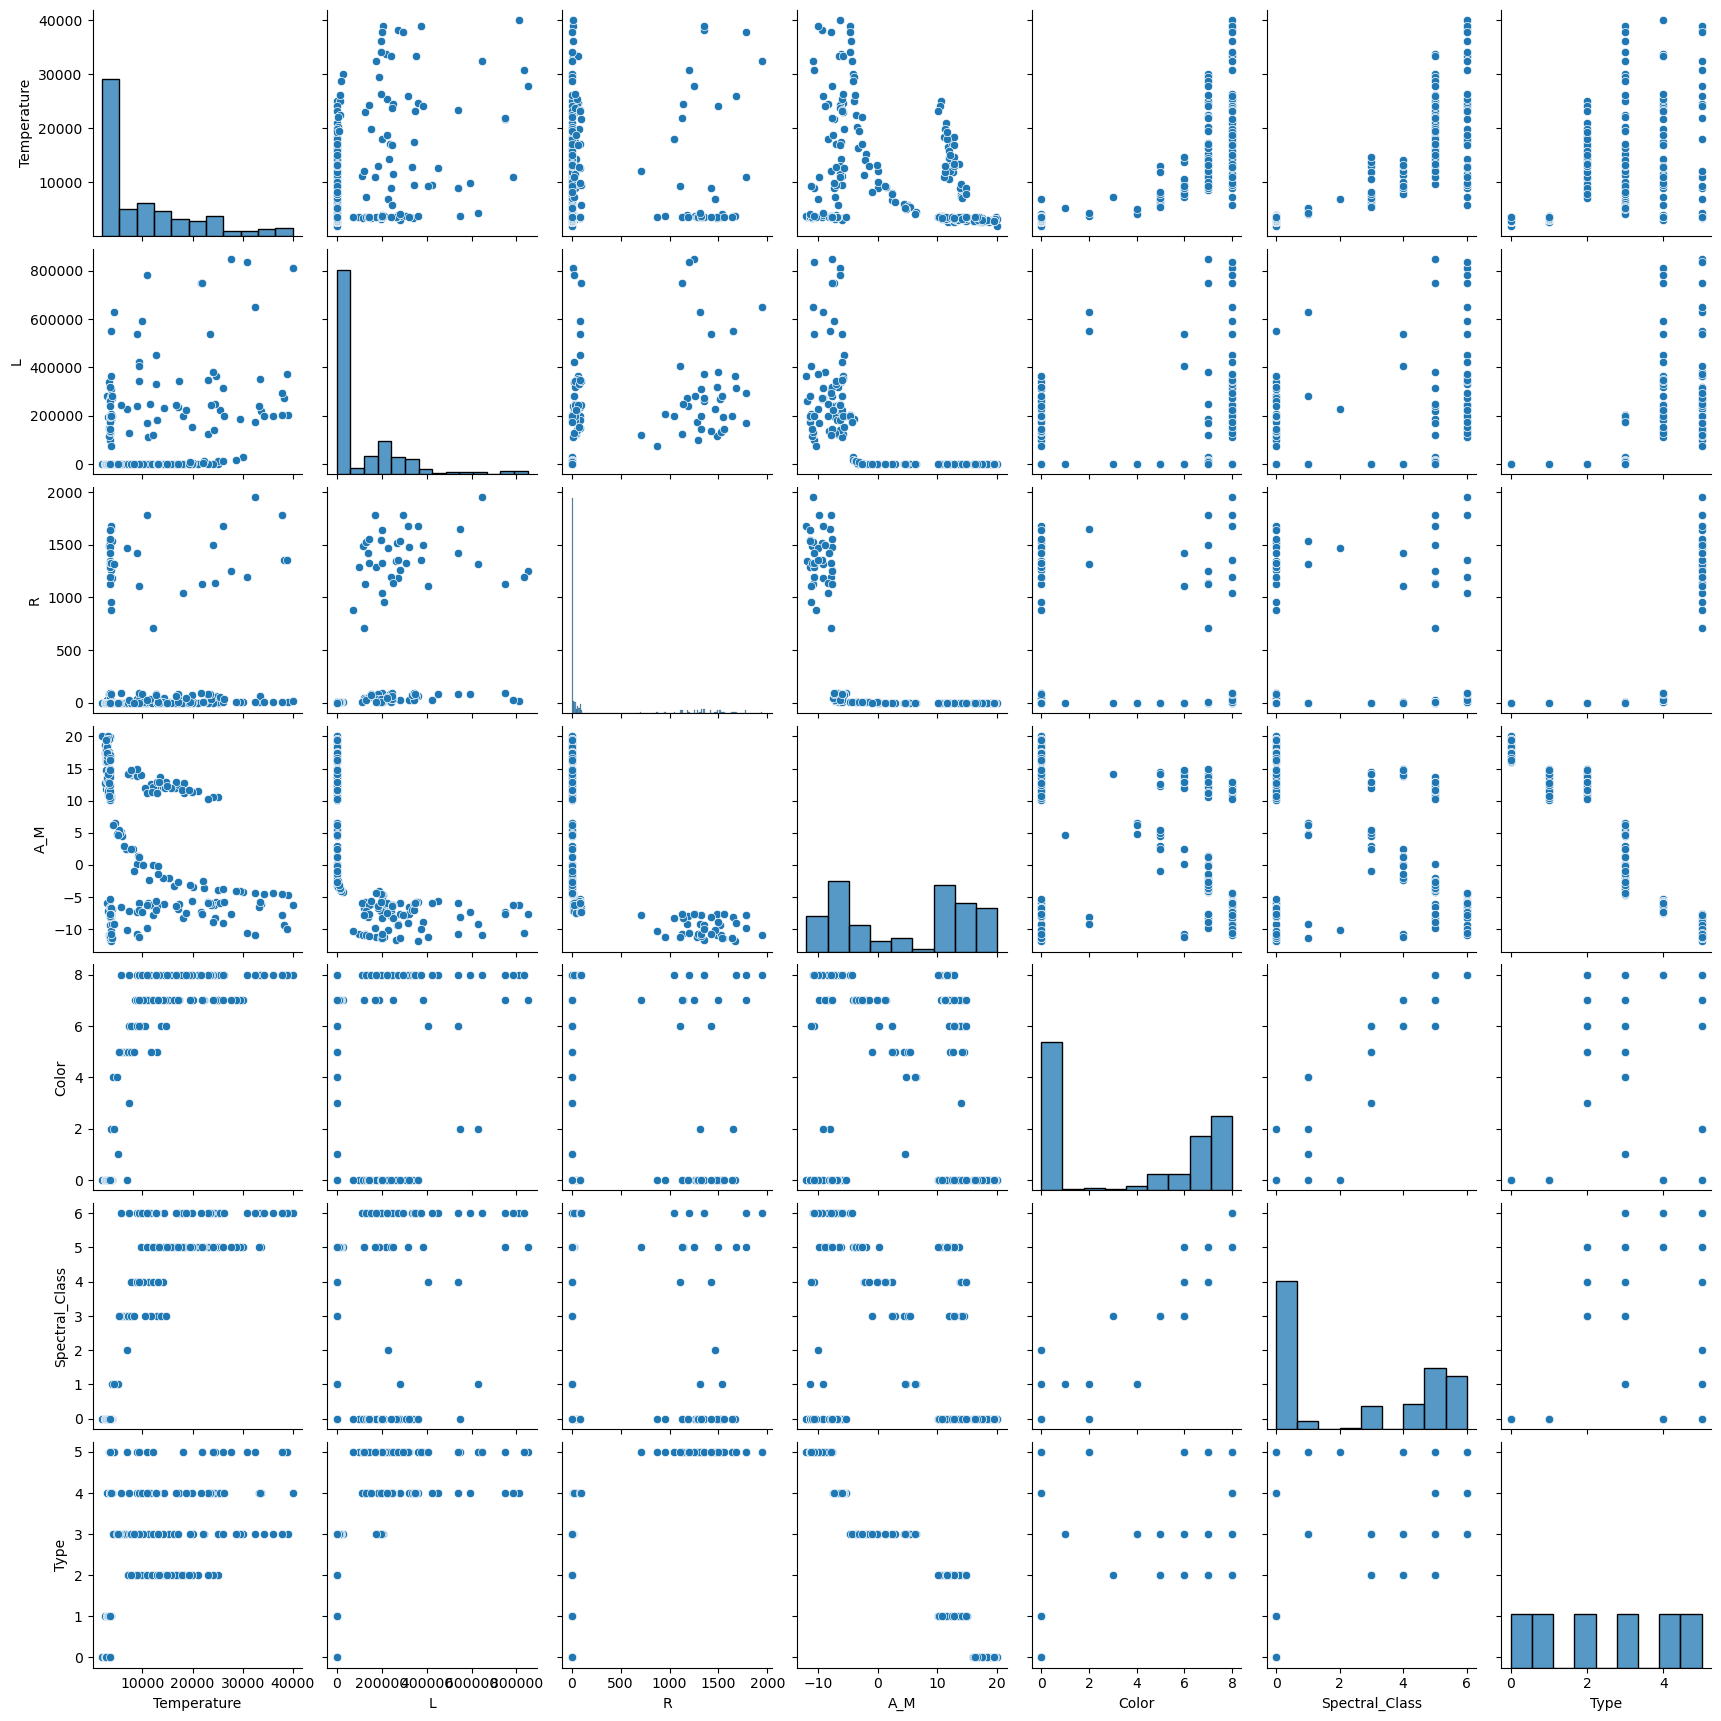

In [41]:
# Visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
# Basic correlogram
sns.pairplot(stars_data)
plt.show()

In [42]:
ax = sns.countplot(x = y)
ax.set_xlabel('Star Types')
ax.set_ylabel('Counts')

Text(0, 0.5, 'Counts')

/var/folders/6x/qqyk_8ld20n7zhvpnc_7mtjh0000gn/T/ipykernel_37917/1841612380.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = stars_data, x='Color', ax =axs[5], palette = colors)


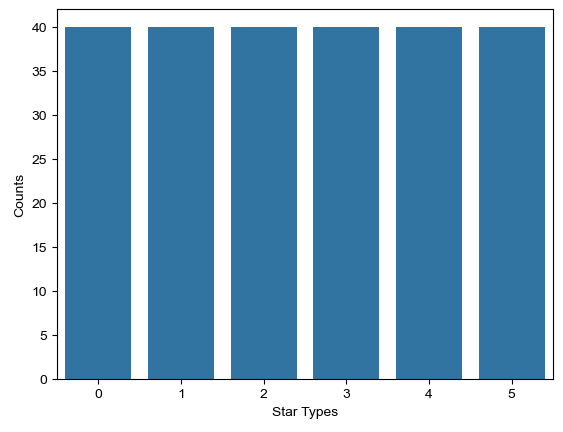

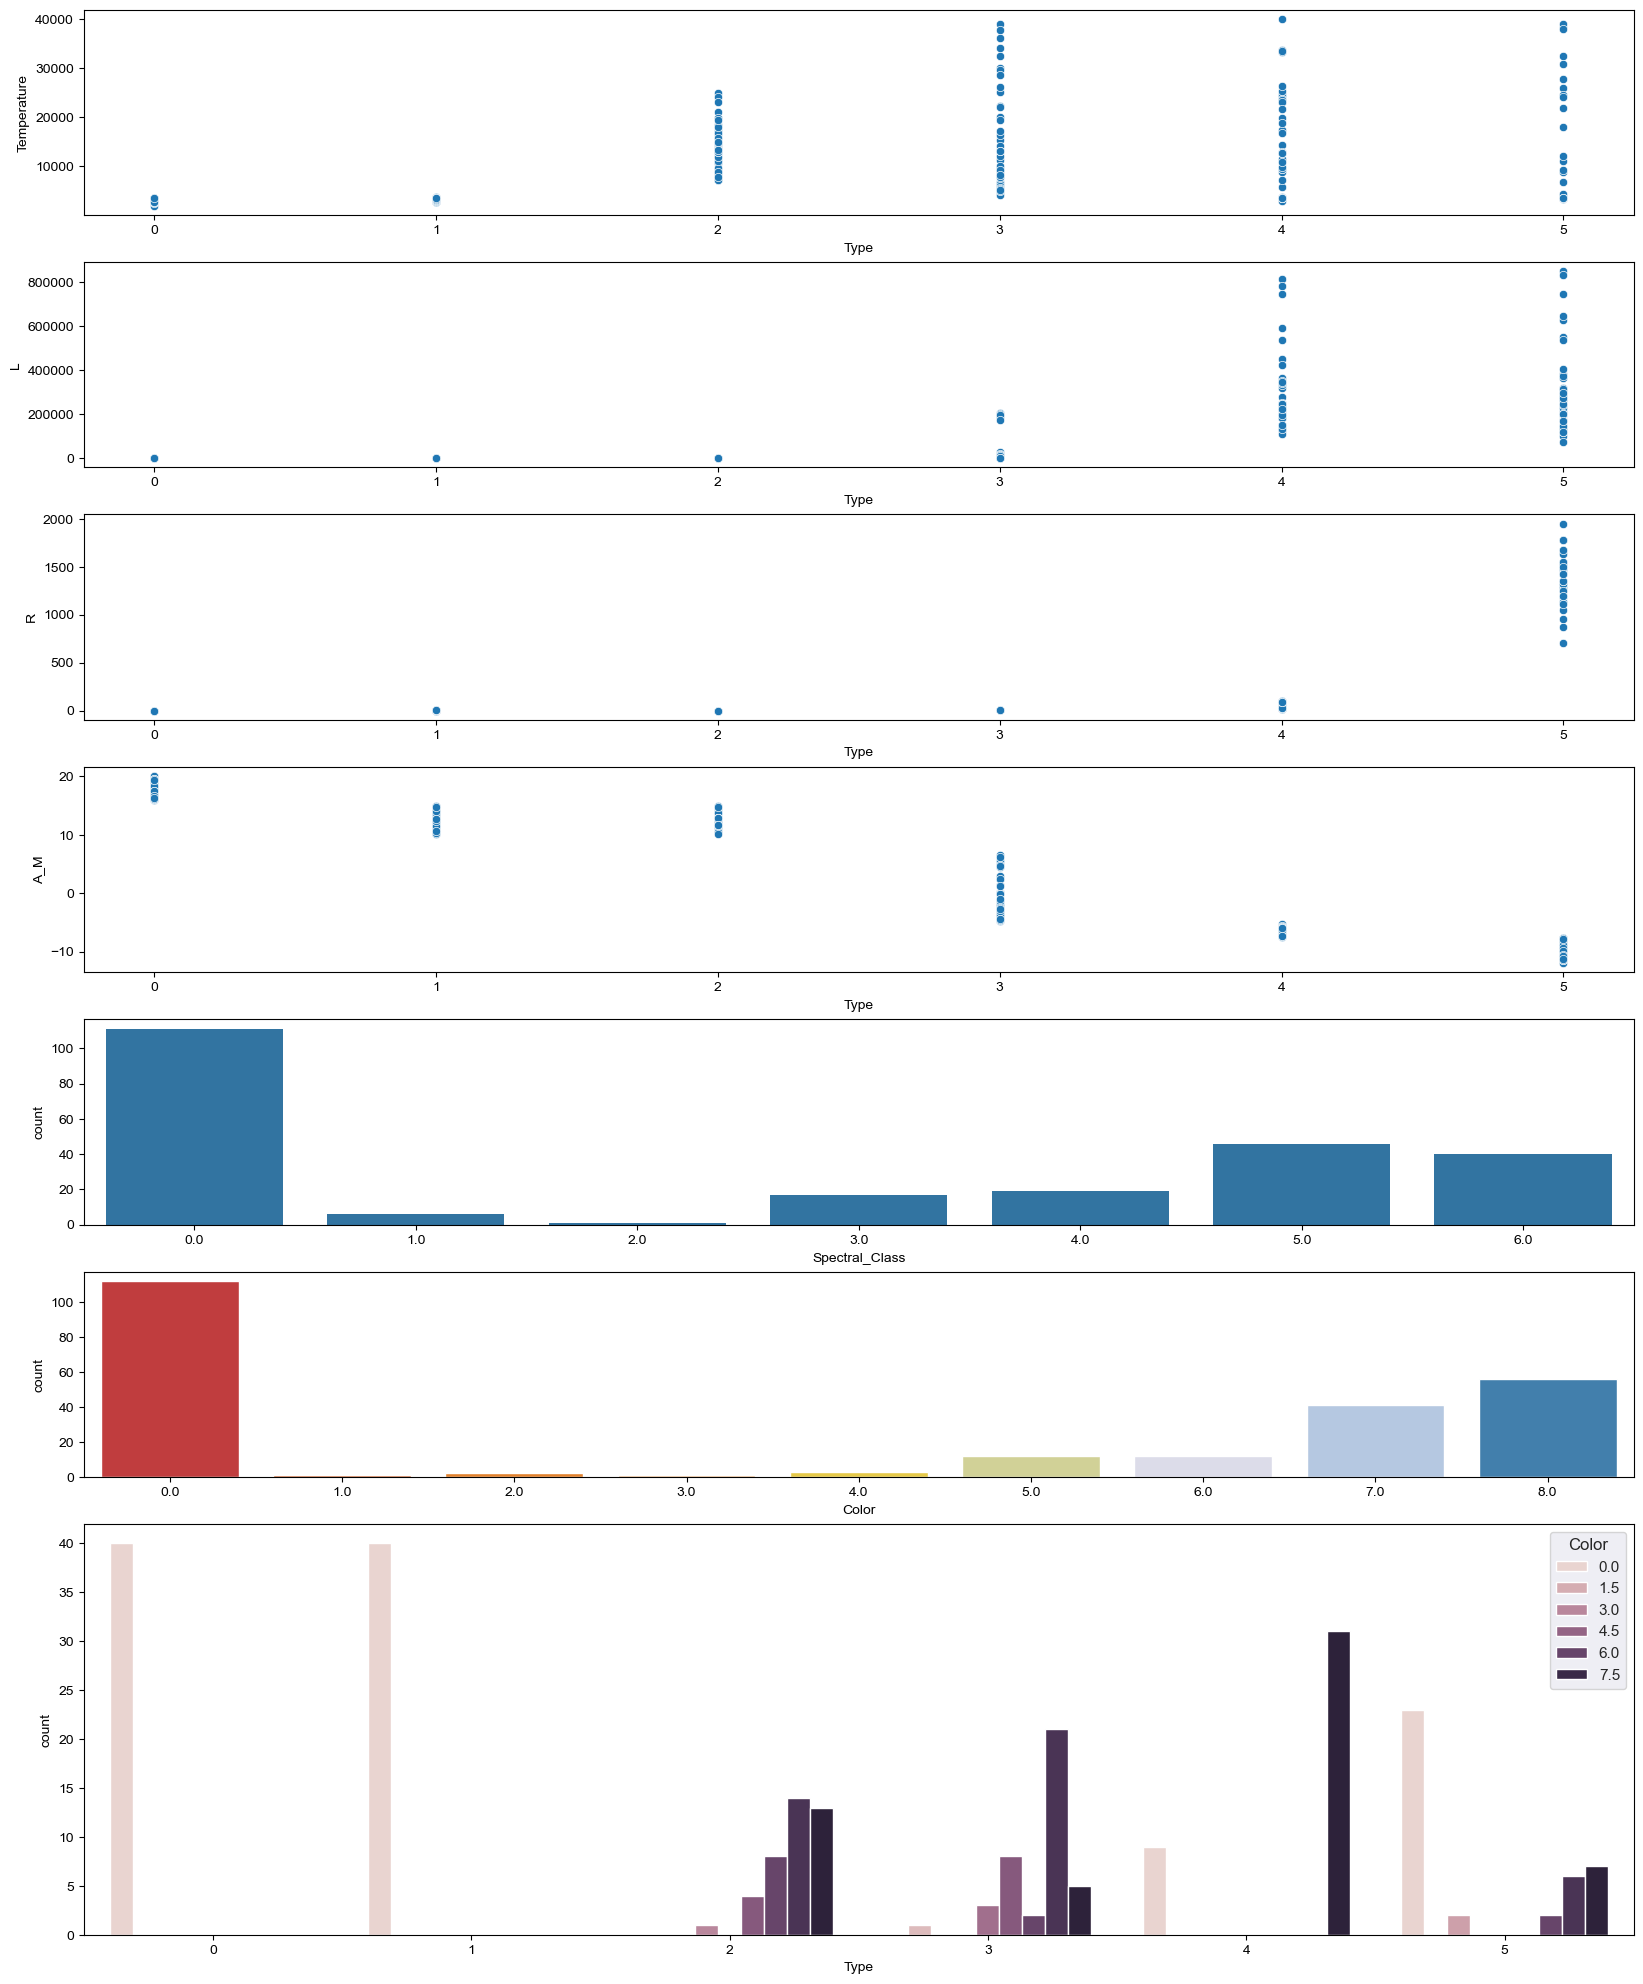

In [43]:
fig, axs = plt.subplots(7, 1, figsize=(20, 25), gridspec_kw = dict(height_ratios=[2, 2, 2, 2, 2, 2, 4]))

sns.scatterplot(data = stars_data, y='Temperature', x='Type', ax =axs[0])
sns.scatterplot(data = stars_data, y='L', x='Type', ax =axs[1])
sns.scatterplot(data = stars_data, y='R', x='Type', ax =axs[2])
sns.scatterplot(data = stars_data, y='A_M', x='Type', ax =axs[3])
sns.countplot(data = stars_data, x='Spectral_Class', ax =axs[4])
 # 'Red', 'Orange-Red', 'Orange', 'Pale yellow orange', 'Yellowish', 'yellow-white', 'White', 'Blue-white', 'Blue'
colors = ['#d62728', '#e6550d', '#ff7f0e', '#ffbb78', '#ffd92f', '#dbdb8d', '#dadaeb', '#aec7e8', '#3182bd']
#colors = ["#F72585", "#7209B7", "#3A0CA3", "#4361EE", "#4CC9F0"]
sns.set()
sns.countplot(data = stars_data, x='Color', ax =axs[5], palette = colors)
sns.countplot(data = stars_data, x = 'Type', hue = 'Color', ax=axs[6])
plt.show()

In [44]:
# do train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#### We use MinMaxScaler to scale numerical features for x_train and x_test.

In [46]:
# Scale the numerical features Temperature, L, R and A_M
from sklearn.preprocessing import MinMaxScaler

X_train_numerical = X_train[numerical_features]
sc = MinMaxScaler()
scaled_X_train_numerical = sc.fit_transform(X_train_numerical)
print(pd.DataFrame(scaled_X_train_numerical).describe())
print(scaled_X_train_numerical)

                0             1           2           3
count  192.000000  1.920000e+02  192.000000  192.000000
mean     0.227638  1.217782e-01    0.130236    0.510743
std      0.258280  2.015386e-01    0.275496    0.330783
min      0.000000  0.000000e+00    0.000000    0.000000
25%      0.037850  8.967884e-10    0.000046    0.174406
50%      0.094560  5.582633e-08    0.000355    0.693558
75%      0.340897  2.331002e-01    0.023219    0.805191
max      1.000000  1.000000e+00    1.000000    1.000000
[[4.10134643e-02 1.17727390e-01 6.61533055e-01 3.81488430e-02]
 [9.69833518e-01 3.47181606e-01 9.15062503e-01 1.28830519e-01]
 [2.41763579e-02 3.06091215e-10 4.28023400e-05 9.03064415e-01]
 [3.89924719e-01 1.50455596e-03 2.91076441e-03 2.68918074e-01]
 [6.96149591e-01 1.00000000e+00 6.42544007e-01 1.35397123e-01]
 [4.32260328e-02 1.43627416e-09 1.27072655e-04 8.20825516e-01]
 [8.56156067e-02 7.41588378e-07 4.45267508e-04 5.19074422e-01]
 [2.09411511e-01 8.71181748e-05 1.47888757e-03 3.777360

In [47]:
X_test_numerical = X_test[numerical_features]
scaled_X_test_numerical = sc.transform(X_test_numerical)
print(pd.DataFrame(scaled_X_test_numerical).describe())
print(scaled_X_test_numerical)

               0             1             2          3
count  48.000000  4.800000e+01  4.800000e+01  48.000000
mean    0.244094  1.438376e-01  8.760038e-02   0.505870
std     0.257900  2.478909e-01  2.197595e-01   0.326963
min     0.017835  7.063643e-11  2.001548e-07   0.005316
25%     0.040831  9.594782e-10  5.445238e-05   0.183365
50%     0.137503  8.445998e-07  4.511695e-04   0.515916
75%     0.429724  2.740959e-01  1.564882e-02   0.794168
max     1.026983  9.571237e-01  7.595576e-01   0.998749
[[8.49464397e-01 4.14400414e-01 3.43812619e-02 1.91682301e-01]
 [4.50068805e-02 2.58058440e-08 1.90711625e-04 6.89180738e-01]
 [1.19829470e-01 1.58922559e-06 4.98642129e-04 4.64352720e-01]
 [4.34688756e-02 4.61491371e-09 1.45035267e-04 7.13258286e-01]
 [6.04570843e-01 1.67172894e-01 2.92490868e-02 1.77611007e-01]
 [2.42600038e-01 9.22900332e-01 1.28261266e-02 1.78111320e-01]
 [6.53004506e-01 1.70940170e-02 2.81325308e-03 2.53908693e-01]
 [5.86573487e-01 2.87596242e-01 1.79583017e-02 1.766729

### - MODEL BUILDING -

We will build a variety of models and evaluate their performance.

Some considerations for this data:
- This is a classification problem: Can we classify a star into 1 of 6 types based on its features? Models to consider for classification: Logistic Regression, Random Forest, Support Vector Machine (SVM), K-Nearest Neighbor (KNN)
- star type is labeled in the data, therefore we are doing supervised learning
- dataset is relatively small (240 rows) and is balanced (40 rows per class)
- since dataset is small, can try tuning hyperparameters with GridSearch (as opposed to randomsearch) for highest accuracy. GridSearch is more computationally expensive, but this may not be a concern if dataset and hyperparameter space are not too big.
- no missing data
- mix of numerical and categorical features

#### Model 1: Logistic Regression #####

In [51]:
# first using default parameters

# Define preprocessing
preprocessor = ColumnTransformer([
    ('num', MinMaxScaler(), numerical_features),   # Scale numerical features
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)  # Encode categorical features
])

# Define pipeline with Logistic Regression
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=0))
])

# Perform cross-validation
scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='accuracy')

# Print results
print(f'Cross-validation accuracy: {scores.mean():.4f} ± {scores.std():.4f}')

Cross-validation accuracy: 0.8387 ± 0.0370


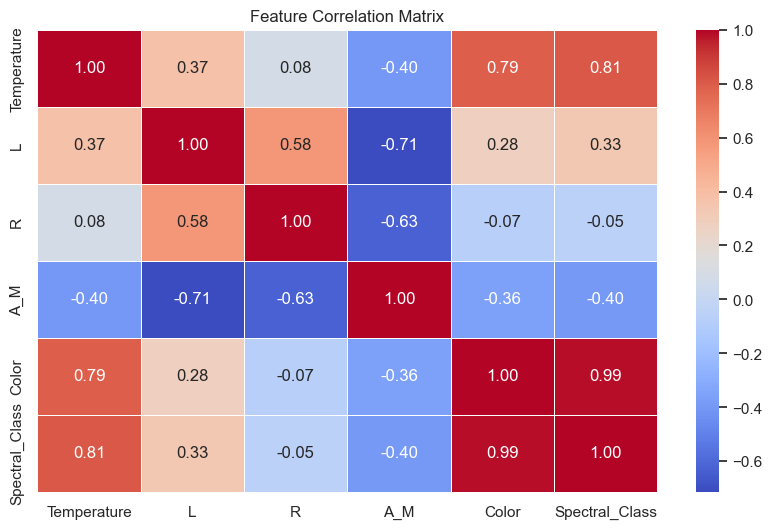

In [52]:
# checking for correlated features

# Compute correlation matrix
corr_matrix = X_train.corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.show()

Observations:
- color and spectral class appear to be perfectly correlated with one another

In [54]:
# dropping column Spectral Class
categorical_features = [col for col in categorical_features if col != 'Spectral_Class']
X_train = X_train.drop(columns=['Spectral_Class'])
X_test = X_test.drop(columns=['Spectral_Class'])

In [55]:
# logistic regression attempt 2
# Define preprocessing
preprocessor = ColumnTransformer([
    ('num', MinMaxScaler(), numerical_features),   # Scale numerical features
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)  # Encode categorical features
])

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=0))
])

# Perform cross-validation
scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='accuracy')

# Print results
print(f'Cross-validation accuracy: {scores.mean():.4f} ± {scores.std():.4f}')

Cross-validation accuracy: 0.8699 ± 0.0227


In [56]:
print(X_train)
print(numerical_features)
print(categorical_features)

     Temperature             L          R    A_M  Color
110         3459  100000.00000  1289.0000 -10.70    0.0
239        37882  294903.00000  1783.0000  -7.80    8.0
63          2835       0.00034     0.0918  16.96    0.0
153        16390    1278.00000     5.6800  -3.32    7.0
233        27739  849420.00000  1252.0000  -7.59    7.0
..           ...           ...        ...    ...    ...
67          2817       0.00098     0.0911  16.45    0.0
192         2994       0.00720     0.2800  13.45    0.0
117         3625   74000.00000   876.0000 -10.25    0.0
47          3574  200000.00000    89.0000  -5.24    0.0
172         4287  630000.00000  1315.0000  -9.20    2.0

[192 rows x 5 columns]
['Temperature', 'L', 'R', 'A_M']
['Color']


In [57]:
# now with grid search for hyperparameter tuning

# Define the parameter grid
param_grid = {
    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'classifier__penalty': ['l1', 'l2'],
    'classifier__solver': ['liblinear', 'lbfgs', 'saga']
}

# Perform GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best hyperparameters and accuracy
print(f'Best Parameters: {grid_search.best_params_}')
print(f'Best Accuracy: {grid_search.best_score_:.4f}')

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters: {'classifier__C': 100, 'classifier__penalty': 'l2', 'classifier__solver': 'lbfgs'}
Best Accuracy: 0.9843


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max

In [58]:
# Define pipeline
pipeline_loreg_best = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(C=100, penalty="l2", solver="lbfgs", random_state=0))
])

# Perform cross-validation
scores = cross_val_score(pipeline_loreg_best, X_train, y_train, cv=5, scoring='accuracy')

# Print results
print(f'Cross-validation accuracy: {scores.mean():.4f} ± {scores.std():.4f}')

Cross-validation accuracy: 0.9843 ± 0.0210


Observations:
- dropping a redundant feature seemed to improve accuracy a little bit
- hyperparameter tuning led to a bigger jump in accuracy

#### Logistic Regression Evaluation

In [61]:
# fit the model to the training data
pipeline_loreg_best.fit(X_train, y_train)

# Get predictions on test set
y_pred_loreg = pipeline_loreg_best.predict(X_test)

print(classification_report(y_test, y_pred_loreg, target_names=[f"Type {i}" for i in range(6)]))

# Compute ROC-AUC
y_test_bin = label_binarize(y_test, classes=range(6))  # Assuming 6 star types
y_pred_proba_loreg = pipeline_loreg_best.predict_proba(X_test)
roc_auc_loreg = roc_auc_score(y_test_bin, y_pred_proba_loreg, multi_class='ovr')
print(f"Logistic Regression ROC-AUC (OvR): {roc_auc_loreg:.4f}")

              precision    recall  f1-score   support

      Type 0       1.00      1.00      1.00         7
      Type 1       1.00      1.00      1.00         9
      Type 2       1.00      1.00      1.00         7
      Type 3       1.00      1.00      1.00         8
      Type 4       1.00      1.00      1.00        11
      Type 5       1.00      1.00      1.00         6

    accuracy                           1.00        48
   macro avg       1.00      1.00      1.00        48
weighted avg       1.00      1.00      1.00        48

Logistic Regression ROC-AUC (OvR): 1.0000


#### Model 2: Random Forest #####

In [63]:
# using default parameters

# Define pipeline with Random Forest Classifier
pipeline_rf = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=0))
])

# Perform cross-validation
scores = cross_val_score(pipeline_rf, X_train, y_train, cv=5, scoring='accuracy')

# Print results
print(f'Cross-validation accuracy: {scores.mean():.4f} ± {scores.std():.4f}')

Cross-validation accuracy: 0.9947 ± 0.0105


Observations:
- the random forest classifier achieves exceptionally high accuracy on this dataset, even when just using the default parameter values with no tuning
- the logistic regression model on the other hand did not perform as well using the default values, but with tuning we were able to achieve an accuracy approaching that of the random forest model.
- one advantage of logistic regression models is that they are simpler and easier to interpret. Having a slightly less accurate model that is easier to understand may be a good reason to ultimately select logistic regression for this problem.

#### Random Forest Evaluation

In [66]:
# fit model to training data
pipeline_rf.fit(X_train, y_train)

# Get predictions on test set
y_pred_rf = pipeline_rf.predict(X_test)

# Print classification report
print("Classification Report for Random Forest:")
print(classification_report(y_test, y_pred_rf, target_names=[f"Type {i}" for i in range(6)]))  # Assuming 6 star types

# Compute ROC-AUC
y_pred_proba_rf = pipeline_rf.predict_proba(X_test)
roc_auc_rf = roc_auc_score(y_test_bin, y_pred_proba_rf, multi_class='ovr')
print(f"Random Forest ROC-AUC (OvR): {roc_auc_rf:.4f}")

Classification Report for Random Forest:
              precision    recall  f1-score   support

      Type 0       1.00      1.00      1.00         7
      Type 1       1.00      1.00      1.00         9
      Type 2       1.00      1.00      1.00         7
      Type 3       1.00      1.00      1.00         8
      Type 4       1.00      1.00      1.00        11
      Type 5       1.00      1.00      1.00         6

    accuracy                           1.00        48
   macro avg       1.00      1.00      1.00        48
weighted avg       1.00      1.00      1.00        48

Random Forest ROC-AUC (OvR): 1.0000


In [144]:
# Extract feature importances
feature_importances = pipeline_rf.named_steps['classifier'].feature_importances_
feature_names = pipeline_rf.named_steps['preprocessor'].get_feature_names_out()

# Display feature importance
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print("\nFeature Importance:")
print(importance_df)


Feature Importance:
             Feature  Importance
3           num__A_M    0.307500
2             num__R    0.295238
1             num__L    0.156271
0   num__Temperature    0.121784
4     cat__Color_0.0    0.052291
12    cat__Color_8.0    0.029499
11    cat__Color_7.0    0.023193
9     cat__Color_5.0    0.006762
10    cat__Color_6.0    0.005095
8     cat__Color_4.0    0.001253
5     cat__Color_1.0    0.000547
6     cat__Color_2.0    0.000310
7     cat__Color_3.0    0.000256


#### Model 3: Support Vector Machine #####

In [69]:
# First using default parameters
# Define pipeline with SVM Classifier
pipeline_svm = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', SVC(random_state=0))
])

# Perform cross-validation
scores = cross_val_score(pipeline_svm, X_train, y_train, cv=5, scoring='accuracy')

# Print results
print(f'Cross-validation accuracy: {scores.mean():.4f} ± {scores.std():.4f}')

Cross-validation accuracy: 0.9013 ± 0.0409


In [70]:
# now with grid search for hyperparameter tuning

param_grid = {
    'classifier__C': [0.1, 1, 10, 100],
    'classifier__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'classifier__gamma': ['scale', 'auto', 0.01, 0.1, 1]
}

# Set up GridSearchCV
grid_search = GridSearchCV(pipeline_svm, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

# Fit the model
grid_search.fit(X_train, y_train)

# Print best parameters and accuracy
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Accuracy: {grid_search.best_score_:.4f}")

Fitting 5 folds for each of 80 candidates, totalling 400 fits
Best Parameters: {'classifier__C': 100, 'classifier__gamma': 'scale', 'classifier__kernel': 'linear'}
Best Accuracy: 0.9895


In [71]:
# final SVM model using optimal parameters

# Define pipeline
pipeline_svm_best = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', SVC(C=100, gamma="scale", kernel="linear", random_state=0))
])

# Perform cross-validation
scores = cross_val_score(pipeline_svm_best, X_train, y_train, cv=5, scoring='accuracy')

# Print results
print(f'Cross-validation accuracy: {scores.mean():.4f} ± {scores.std():.4f}')

Cross-validation accuracy: 0.9895 ± 0.0211


#### Evaluate Support Vector Machine Model

In [73]:
pipeline_svm_best.fit(X_train, y_train)
y_pred_svm = pipeline_svm_best.predict(X_test)

# Print classification report
print("Classification Report for SVM:")
print(classification_report(y_test, y_pred_svm, target_names=[f"Type {i}" for i in range(6)]))  # Assuming 6 star types

y_pred_proba_svm = pipeline_svm_best.decision_function(X_test)  # SVM uses decision_function instead of predict_proba

# Compute ROC-AUC
roc_auc_svm = roc_auc_score(y_test_bin, y_pred_proba_svm, multi_class='ovr')
print(f"SVM ROC-AUC (OvR): {roc_auc_svm:.4f}")


Classification Report for SVM:
              precision    recall  f1-score   support

      Type 0       1.00      1.00      1.00         7
      Type 1       1.00      1.00      1.00         9
      Type 2       1.00      1.00      1.00         7
      Type 3       1.00      1.00      1.00         8
      Type 4       1.00      1.00      1.00        11
      Type 5       1.00      1.00      1.00         6

    accuracy                           1.00        48
   macro avg       1.00      1.00      1.00        48
weighted avg       1.00      1.00      1.00        48

SVM ROC-AUC (OvR): 1.0000


#### Model 4: K-Nearest Neighbor (KNN)

In [75]:
# First using default parameters
# Define pipeline with KNN Classifier
pipeline_knn = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier())
])

# Perform cross-validation
scores = cross_val_score(pipeline_knn, X_train, y_train, cv=5, scoring='accuracy')

# Print results
print(f'Cross-validation accuracy: {scores.mean():.4f} ± {scores.std():.4f}')

Cross-validation accuracy: 0.9378 ± 0.0479


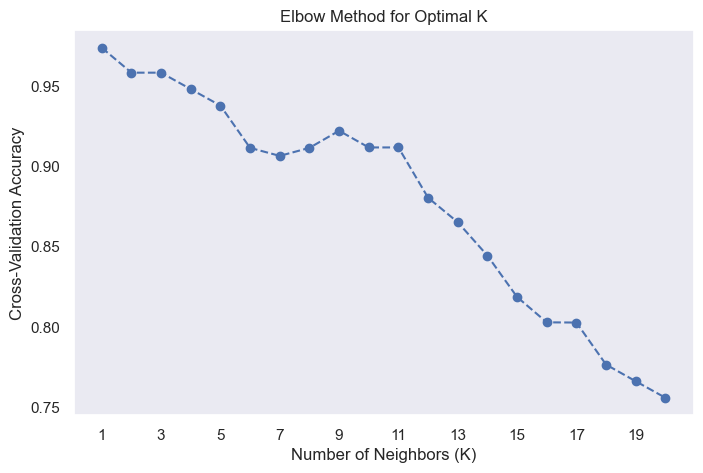

In [76]:
# Exploring k values visually

# Define range of K values to test
k_values = range(1, 21)  # Test K from 1 to 20
cv_scores = []  # Store cross-validation accuracy for each K

for k in k_values:
    pipeline_knn = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', KNeighborsClassifier(n_neighbors=k))
    ])
    
    scores = cross_val_score(pipeline_knn, X_train, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())  # Store mean accuracy

# Plot K vs. Accuracy
plt.figure(figsize=(8, 5))
plt.plot(k_values, cv_scores, marker='o', linestyle='dashed', color='b')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Cross-Validation Accuracy')
plt.title('Elbow Method for Optimal K')
plt.xticks(np.arange(1, 21, step=2))  # Adjust x-axis labels for readability
plt.grid()
plt.show()

Observations:
- interestingly, it looks like the best performance is when k = 1
- possible explanations for this: the dataset is small, few/no outliers, cleanly separated classes
- will still explore other values of k with grid search to verify

In [78]:
# now with hyperparameter tuning

param_grid = {
    'classifier__n_neighbors': [1, 3, 5, 7, 9, 11],
    'classifier__weights': ['uniform', 'distance'],
    'classifier__metric': ['euclidean', 'manhattan', 'minkowski']
}

# Set up GridSearchCV
grid_search = GridSearchCV(pipeline_knn, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

# Fit the model
grid_search.fit(X_train, y_train)

# Print best parameters and accuracy
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Accuracy: {grid_search.best_score_:.4f}")

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters: {'classifier__metric': 'euclidean', 'classifier__n_neighbors': 1, 'classifier__weights': 'uniform'}
Best Accuracy: 0.9738


In [79]:
# final KNN model using optimal parameters
# Define pipeline
pipeline_knn_best = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier(n_neighbors=1, metric="euclidean", weights="distance"))
])

# Perform cross-validation
scores = cross_val_score(pipeline_knn_best, X_train, y_train, cv=5, scoring='accuracy')

# Print results
print(f'Cross-validation accuracy: {scores.mean():.4f} ± {scores.std():.4f}')

Cross-validation accuracy: 0.9738 ± 0.0408


#### Evaluate K Nearest Neighbor Model

In [81]:
# Evaluate KNN

pipeline_knn_best.fit(X_train, y_train)
y_pred_knn = pipeline_knn_best.predict(X_test)

# Print classification report
print("Classification Report for KNN:")
print(classification_report(y_test, y_pred_knn, target_names=[f"Type {i}" for i in range(6)]))  # Assuming 6 star types

# Compute ROC-AUC
y_pred_proba_knn = pipeline_knn_best.predict_proba(X_test)
roc_auc_knn = roc_auc_score(y_test_bin, y_pred_proba_knn, multi_class='ovr')
print(f"KNN ROC-AUC (OvR): {roc_auc_knn:.4f}")

Classification Report for KNN:
              precision    recall  f1-score   support

      Type 0       1.00      1.00      1.00         7
      Type 1       1.00      1.00      1.00         9
      Type 2       1.00      1.00      1.00         7
      Type 3       1.00      1.00      1.00         8
      Type 4       1.00      1.00      1.00        11
      Type 5       1.00      1.00      1.00         6

    accuracy                           1.00        48
   macro avg       1.00      1.00      1.00        48
weighted avg       1.00      1.00      1.00        48

KNN ROC-AUC (OvR): 1.0000


#### Visualization

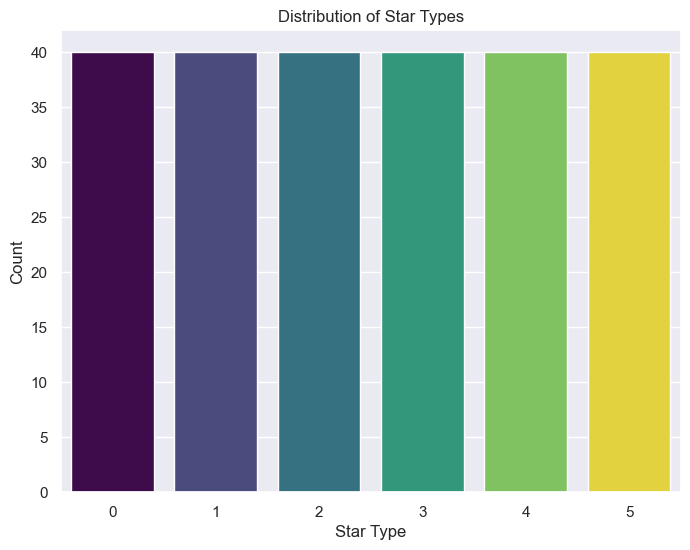

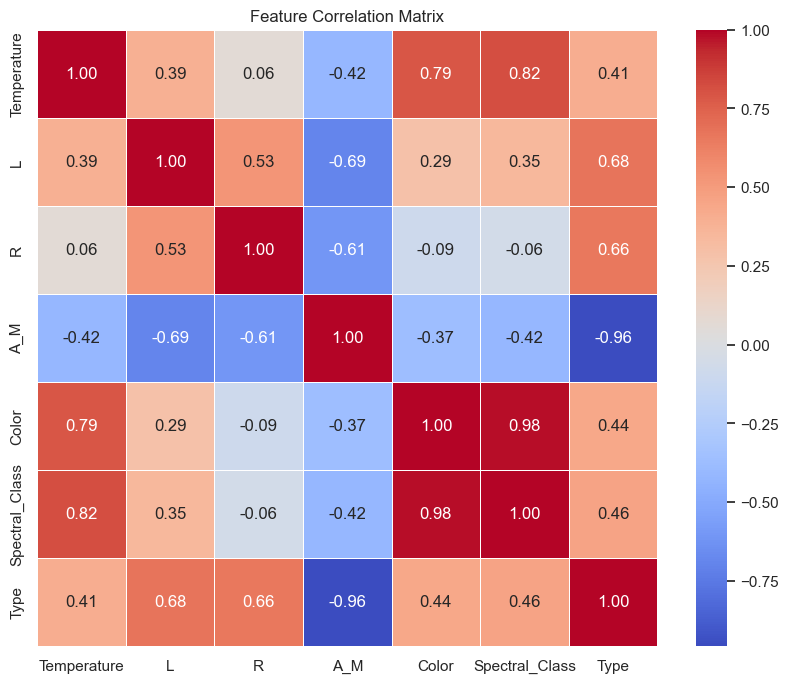

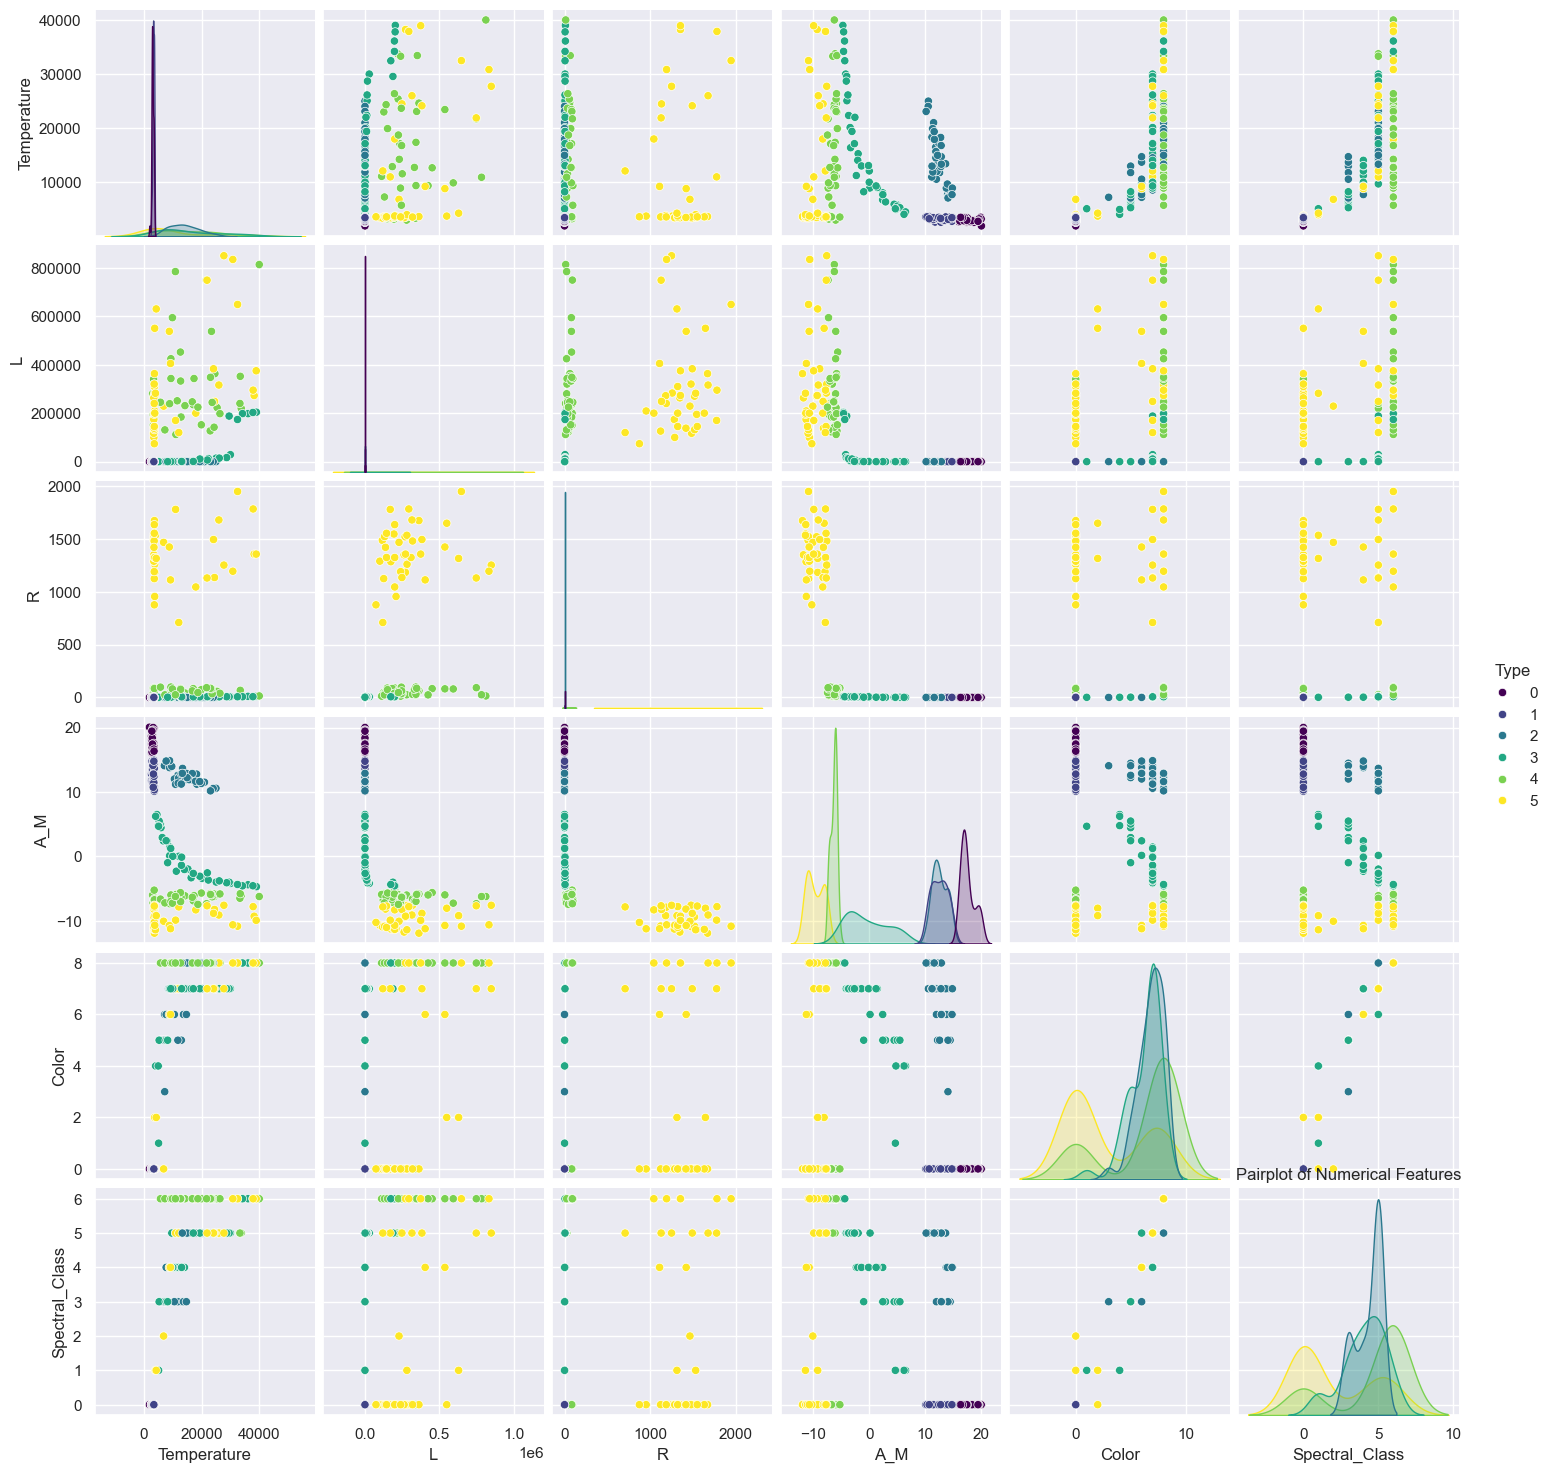

In [83]:
# distribution of star types
plt.figure(figsize=(8, 6))
sns.countplot(x=y, hue=y, palette='viridis', legend=False)
plt.title('Distribution of Star Types')
plt.xlabel('Star Type')
plt.ylabel('Count')
plt.show()

#correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(stars_data.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Feature Correlation Matrix')
plt.show()

#pairplot to visualize numerical feature relationships
sns.pairplot(stars_data, hue='Type', palette='viridis')
plt.title('Pairplot of Numerical Features')
plt.show()

### - THE CONCLUSION -

Random Forest achieved the highest accuracy at about 99%, even just using the default parameters with no tuning. Perhaps the Random Forest model's ability to handle complex, nonlinear relationships explains its ability to handle this data so well. It should be added, though, that with hyperparameter tuning all models achieved accuracy greater than 97%. So, all the models built seem like reasonable candidates. It may ultimately be preferable to select the Logistic Regression model due to its simplicity and interpretability: it is easier to understand and computationally more efficient.

These models reliably and accurately classified stars into their correct types, and we found that the star type was most reliably predicted by brightness, radius, luminosity, and temperature (in that order.) The fact that stars can successfully be classified based on a limited set of attributes affirms the principle that for distant stars, we can infer information about other attributes such as mass, age, etc. after first collecting the measurements available to us and classifying them accordingly.